### well structured - an ode to databases


# linear regression

### import libraries

In [432]:
# access libaries
import yfinance as yf
import sqlite3

# scientific computing pandas (data structures & tools), NumPy (array & tools), SciPy (Integrals, solving differential equations, optimization)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Visualization matplotlib (plots & graphs, most popular), seaborn (plots: heat maps, time series, violin plots)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [433]:
class stock_mode:
    def __init__(self, ticker_symbol):

        # load data
        self.ticker_symbol = ticker_symbol
        self.company_name = yf.Ticker(self.ticker_symbol).info['longName'].replace(r'/', ' ')
        self.currency = yf.Ticker(self.ticker_symbol).info['currency']

# ------------------------ DATABASE -----------------------------------------

    def to_sqlite_database(self, db_name):

        conn = sqlite3.connect(db_name)
        self.to_sql_stock_prices.to_sql(name=self.company_name, con=conn, if_exists='replace')
        conn.commit()
        conn.close() 

    def read_sqlite_database(self, ticker_symbol, db_name, columns):
               
        company_name = yf.Ticker(ticker_symbol).info['longName'].replace(r'/', ' ')
        conn = sqlite3.connect(db_name)
        sql = "SELECT " + columns + " FROM `" + company_name + "`"
        result = pd.read_sql(sql,conn)
        return result
    
# ------------------------ SCIENTIFIC COMPUTING -----------------------------------------



build dataframe

In [434]:
ticker_symbols = ['WOOE.AS', 'WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']
bucket_stock_prices = pd.DataFrame()

for ticker_symbol in ticker_symbols:
    
    # load first item
    stock_mode_obj = stock_mode(ticker_symbol)
    columns = '`close_normal_' + ticker_symbol + '`'
    bucket_stock_prices_load = stock_mode_obj.read_sqlite_database(stock_mode_obj.ticker_symbol, 'stocks_prep.db', columns)

    # concat data
    bucket_stock_prices = pd.concat([bucket_stock_prices, bucket_stock_prices_load], axis=1)

bucket_stock_prices.head(2)

,close_normal_WOOE.AS,close_normal_WY,close_normal_SCA-B.ST,close_normal_SUZ,close_normal_SK3.IR,close_normal_IP,close_normal_STERV.HE,close_normal_RYN,close_normal_WFG,close_normal_WRK,close_normal_PCH
0,0.780673,0.797964,0.644627,0.635598,0.896732,0.901814,0.684542,0.779544,0.695476,0.810607,0.846914
1,0.777786,0.777169,0.627652,0.628880,0.884664,0.895734,0.673074,0.770119,0.694028,0.796625,0.833761


# simple linear regression

In [440]:
#sim_lin_reg_dep_var = pd.DataFrame(bucket_stock_prices['close_normal_WOOE.AS'])

ticker_symbols = ['WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']

bucket_sim_lin_reg = pd.DataFrame(bucket_stock_prices['close_normal_WOOE.AS'])
 
for ticker_symbol in ticker_symbols:
    sim_lin_reg_obj = LinearRegression()

    sim_lin_reg_dep_var = pd.DataFrame(bucket_stock_prices['close_normal_WOOE.AS'])
    sim_lin_reg_indep_var = pd.DataFrame(bucket_stock_prices['close_normal_' + ticker_symbol])
    sim_lin_reg_obj.fit(sim_lin_reg_dep_var,sim_lin_reg_indep_var)
    
    # predict model
    bucket_sim_lin_reg_load = sim_lin_reg_obj.predict(sim_lin_reg_dep_var)
        
    # transform and rename df
    bucket_sim_lin_reg_load = map(lambda x: x[0], bucket_sim_lin_reg_load)
    bucket_sim_lin_reg_load = pd.Series(bucket_sim_lin_reg_load)
    bucket_sim_lin_reg_load = bucket_sim_lin_reg_load.rename('sim_lin_reg_' + ticker_symbol)
    
    # concat data
    bucket_sim_lin_reg = pd.concat([bucket_sim_lin_reg, bucket_sim_lin_reg_load], axis=1)

    # calculate intercept and slope
    intercept = sim_lin_reg_obj.intercept_[0].round(5)
    slope = sim_lin_reg_obj.coef_[0].round(5)

    r_square = sim_lin_reg_obj.score(sim_lin_reg_dep_var,sim_lin_reg_indep_var).round(5)
    r_mean_square = mean_squared_error(sim_lin_reg_dep_var, bucket_sim_lin_reg_load).round(5)
    
    print(ticker_symbol)
    print('The intercept is: ' ,intercept,'. And the slope is' , slope[0], 'The R-square is: ', r_square, 'The mean square error: ', r_mean_square) 
#print(bucket_sim_lin_reg.head(2))

WY
The intercept is:  0.02672 . And the slope is 0.90546 The R-square is:  0.66971 The mean square error:  0.00282
SCA-B.ST
The intercept is:  0.18963 . And the slope is 0.67309 The R-square is:  0.41254 The mean square error:  0.00773
SUZ
The intercept is:  0.38092 . And the slope is 0.48347 The R-square is:  0.16704 The mean square error:  0.00405
SK3.IR
The intercept is:  0.1457 . And the slope is 0.7408 The R-square is:  0.36066 The mean square error:  0.00551
IP
The intercept is:  -0.3072 . And the slope is 1.27673 The R-square is:  0.69326 The mean square error:  0.00593
STERV.HE
The intercept is:  -0.4432 . And the slope is 1.36335 The R-square is:  0.61533 The mean square error:  0.01963
RYN
The intercept is:  -0.06672 . And the slope is 0.98477 The R-square is:  0.58154 The mean square error:  0.00632
WFG
The intercept is:  0.14163 . And the slope is 0.73521 The R-square is:  0.46507 The mean square error:  0.00686
WRK
The intercept is:  -0.43075 . And the slope is 1.35395 The

### regression plot

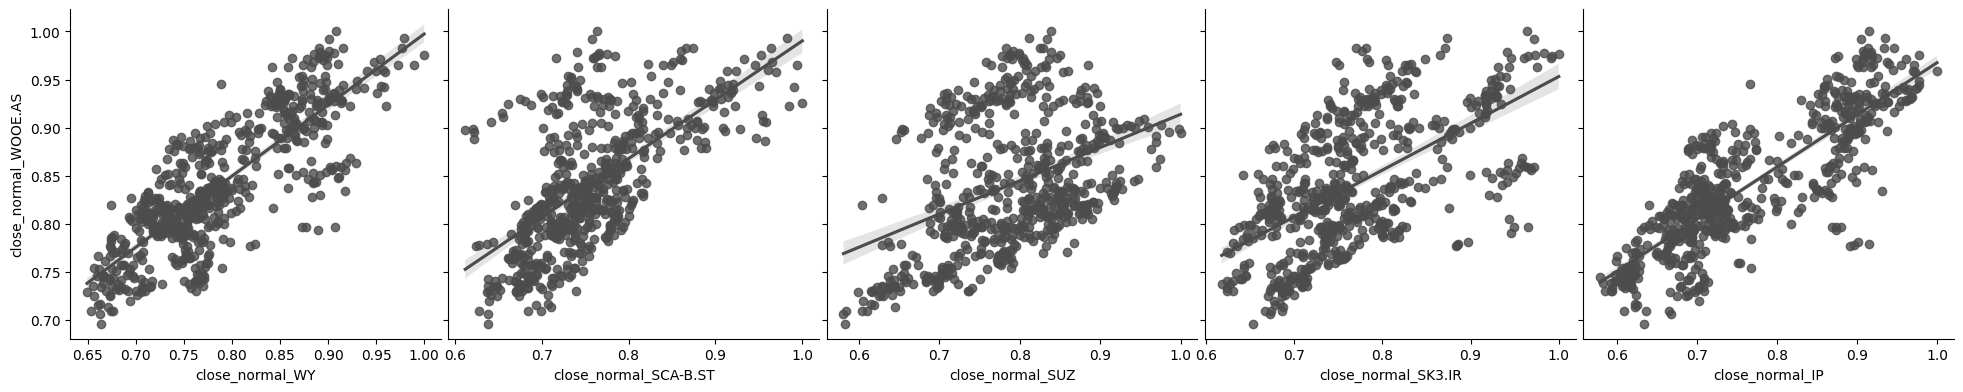

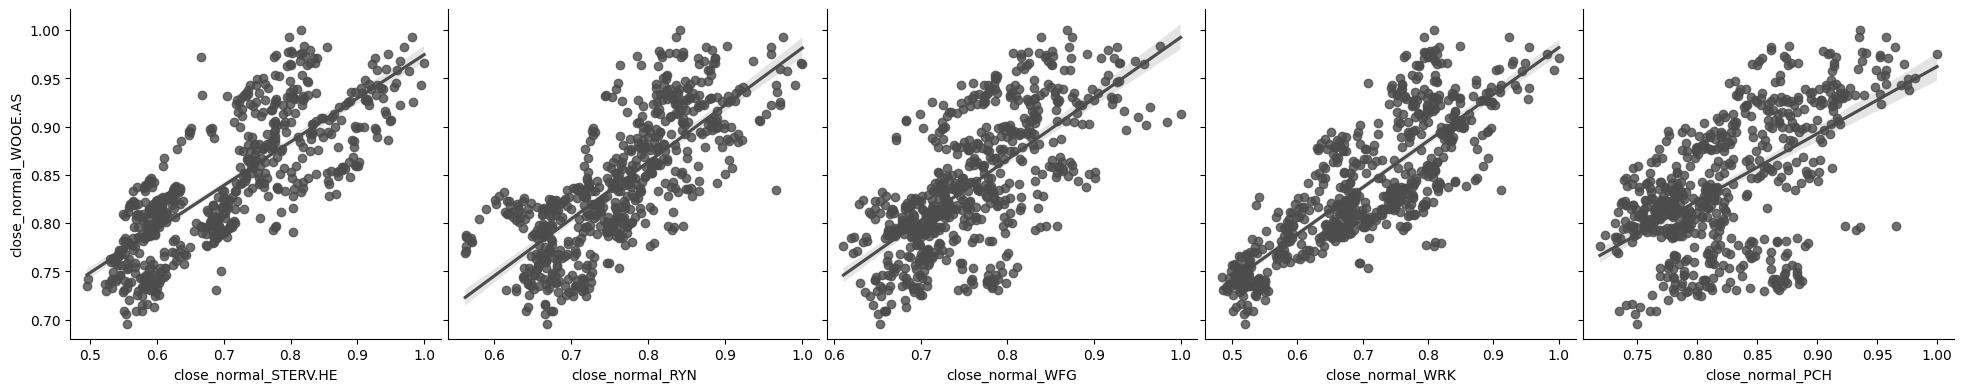

In [334]:
g = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=["close_normal_WY", "close_normal_SCA-B.ST",'close_normal_SUZ', 'close_normal_SK3.IR', 'close_normal_IP'], height=4)
h = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=['close_normal_STERV.HE','close_normal_RYN', 'close_normal_WFG', 'close_normal_WRK', 'close_normal_PCH'], height=4) # y_vars tips = ETF, x_vars = all stocks

g.map(sns.regplot, color=".3")
h.map(sns.regplot, color=".3")

g.figure.subplots_adjust(wspace=.02, hspace=.02)
h.figure.subplots_adjust(wspace=.02, hspace=.02)

<font color='#5891db'>The linear graph shows the predicted values ​​of the linear regression. The points show the actual values. There is a linear relationship that can be visually recognized.</font>

### residual plot

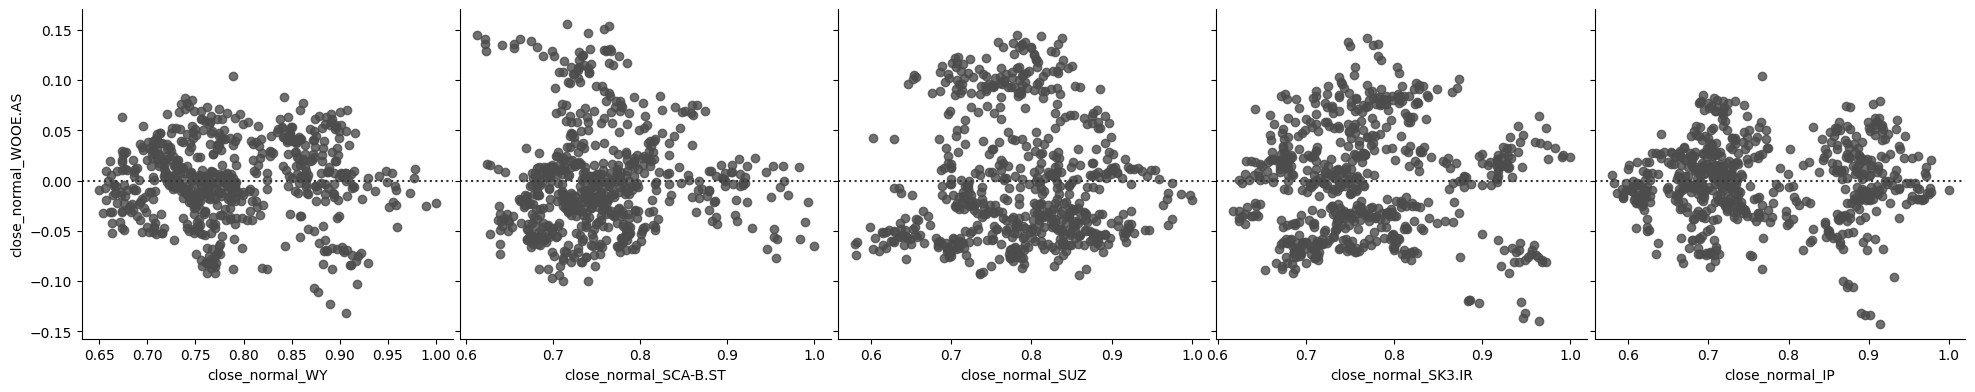

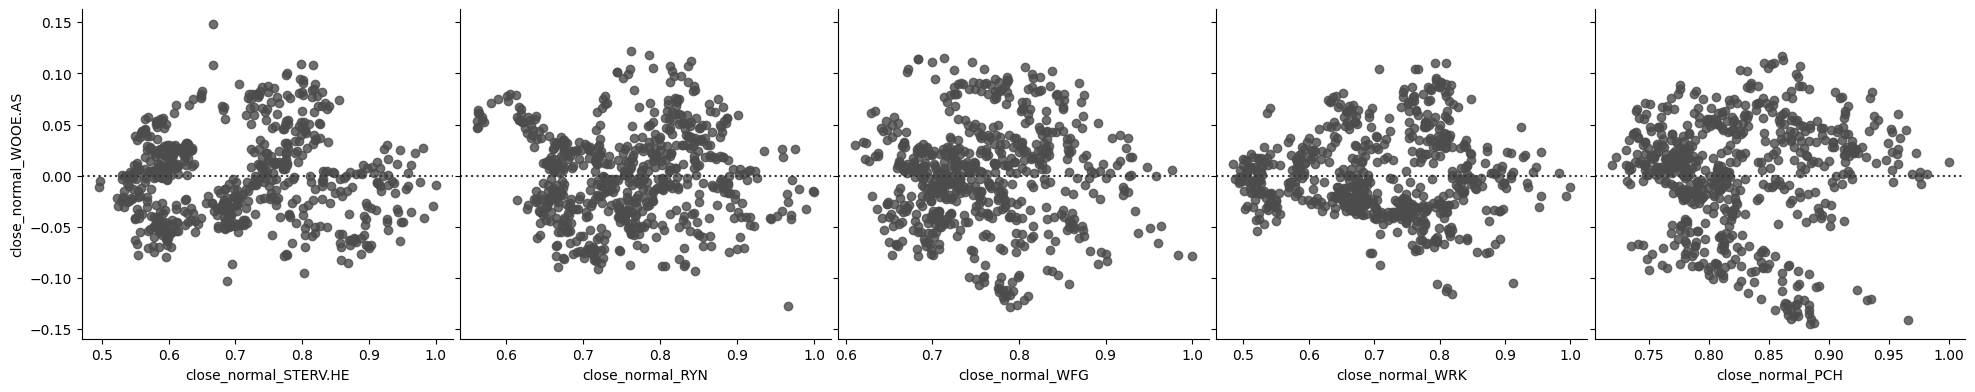

In [335]:
g = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=["close_normal_WY", "close_normal_SCA-B.ST",'close_normal_SUZ', 'close_normal_SK3.IR', 'close_normal_IP'], height=4)
h = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=['close_normal_STERV.HE','close_normal_RYN', 'close_normal_WFG', 'close_normal_WRK', 'close_normal_PCH'], height=4) # y_vars tips = ETF, x_vars = all stocks

g.map(sns.residplot, color=".3")
h.map(sns.residplot, color=".3")

g.figure.subplots_adjust(wspace=.02, hspace=.02)
h.figure.subplots_adjust(wspace=.02, hspace=.02)

<font color='#5891db'>The points are evenly distributed around the zero line and have similar deviations. No curvature is noticeable. A linear relationship is assumed.</font>

<Figure size 2400x2000 with 0 Axes>

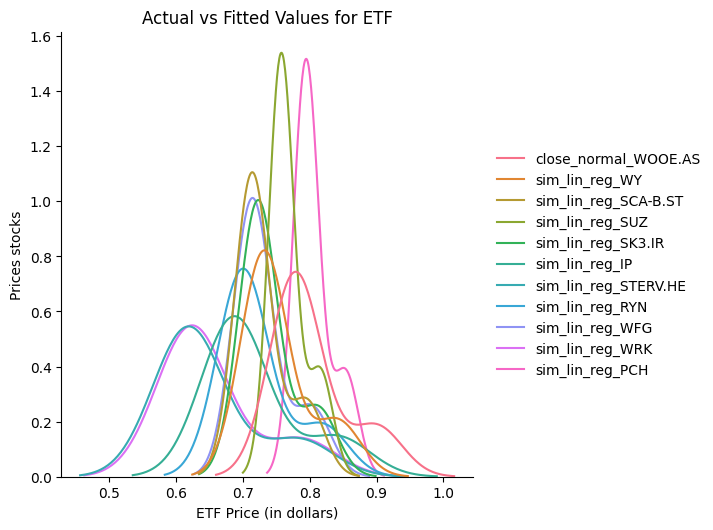

In [343]:
plt.figure(figsize=(24, 20))
sns.displot(bucket_sim_lin_reg, label="Fitted Values" , kind="kde")
plt.title('Actual vs Fitted Values for ETF')
plt.xlabel('normalized stock values')
plt.ylabel('Amount')
plt.show()
plt.close()

# multiple linear regression

In [442]:
mult_lin_reg_dep_var = bucket_stock_prices['close_normal_WOOE.AS']
mult_lin_reg_indep_var = bucket_stock_prices.drop('close_normal_WOOE.AS', axis = 1)


In [445]:
multi_lin_reg_obj = LinearRegression()

# fit model
multi_lin_reg_obj.fit(mult_lin_reg_indep_var, mult_lin_reg_dep_var)

# predict model
bucket_mul_lin_reg_load=multi_lin_reg_obj.predict(mult_lin_reg_indep_var)

# transform and rename df
#bucket_mul_lin_reg_load = map(lambda x: x[0], bucket_mul_lin_reg_load)
bucket_mul_lin_reg_load = pd.Series(bucket_mul_lin_reg_load)
bucket_mul_lin_reg_load = bucket_mul_lin_reg_load.rename('mul_lin_reg')
    
# concat data
bucket_mul_lin_reg = pd.concat([sim_lin_reg_dep_var, bucket_mul_lin_reg_load], axis=1)

# calculate intercept and slope
intercept = multi_lin_reg_obj.intercept_.round(5)
slope = multi_lin_reg_obj.coef_.round(5)

r_square = multi_lin_reg_obj.score(mult_lin_reg_indep_var, mult_lin_reg_dep_var).round(5)
r_mean_square = mean_squared_error(mult_lin_reg_dep_var, bucket_mul_lin_reg_load).round(5)

print('The intercept is: ' ,intercept,'. And the slope is' , slope, 'The R-square is: ', r_square, 'The mean square error: ', r_mean_square) 


The intercept is:  0.12239 . And the slope is [-0.47668  0.16132  0.10875  0.1407   0.21091  0.05985  0.07668  0.26764
  0.19193  0.21462] The R-square is:  0.82206 The mean square error:  0.00082


<Figure size 600x500 with 0 Axes>

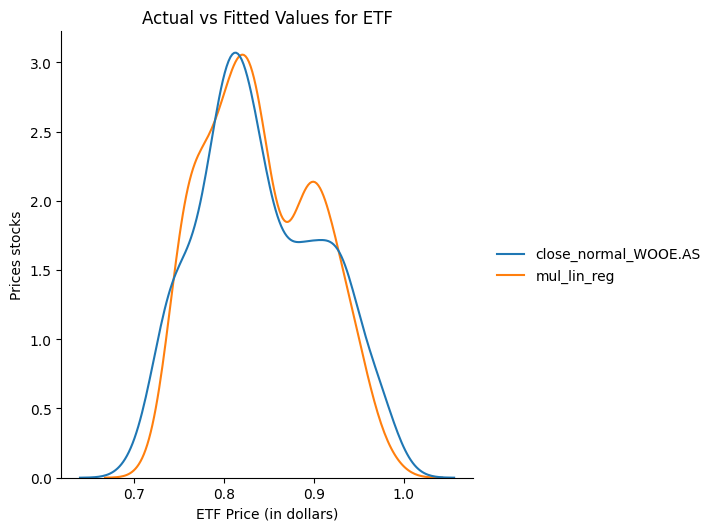

In [394]:
plt.figure(figsize=(6, 5))
sns.displot(bucket_mul_lin_reg, color="r", label="Actual Value", kind="kde")
plt.title('Actual vs Fitted Values for ETF')
plt.xlabel('ETF Price (in dollars)')
plt.ylabel('Prices stocks')
plt.show()
plt.close()

## polynominal regression and pipeline

In [448]:
#sim_lin_reg_dep_var = pd.DataFrame(bucket_stock_prices['close_normal_WOOE.AS'])

ticker_symbols = ['WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']

bucket_sim_lin_reg = pd.DataFrame(bucket_stock_prices['close_normal_WOOE.AS'])
 
for ticker_symbol in ticker_symbols:
    lm = LinearRegression()

    sim_lin_reg_dep_var = pd.DataFrame(bucket_stock_prices['close_normal_WOOE.AS'])
    sim_lin_reg_indep_var = pd.DataFrame(bucket_stock_prices['close_normal_' + ticker_symbol])

    # fit the model
    fitted_pol_reg = np.polyfit(sim_lin_reg_dep_var['close_normal_WOOE.AS'], sim_lin_reg_indep_var['close_normal_' + ticker_symbol], 3)

    # calculate the model equation
    equation_pol_reg = np.poly1d(fitted_pol_reg)

    # r_squared = r2_score(sim_lin_reg_dep_var[['close_normal_WOOE.AS']], fitted_pol_reg(sim_lin_reg_indep_var['close_normal_' + ticker_symbol]))
    # mean_squared_error(aux_var_stock_prices['close_normal_WOOE.AS'], p(x))
    #print(r_squared)
    #print(mean_squared_error)

    print('The equation for ' + ticker_symbol + ' is:', equation_pol_reg, 'The R-square value is: ')
  

The equation for WY is:         3         2
-3.987 x + 11.09 x - 9.255 x + 3.098 The R-square value is: 
The equation for SCA-B.ST is:        3         2
-2.78 x + 6.491 x - 4.31 x + 1.446 The R-square value is: 
The equation for SUZ is:        3         2
32.38 x - 89.24 x + 81.67 x - 24 The R-square value is: 
The equation for SK3.IR is:        3         2
16.88 x - 42.45 x + 36.14 x - 9.649 The R-square value is: 
The equation for IP is:         3         2
-20.33 x + 52.93 x - 44.44 x + 12.79 The R-square value is: 
The equation for STERV.HE is:         3         2
-47.22 x + 119.3 x - 98.61 x + 27.36 The R-square value is: 
The equation for RYN is:         3         2
-37.76 x + 96.38 x - 80.63 x + 22.87 The R-square value is: 
The equation for WFG is:         3         2
-14.14 x + 37.11 x - 31.56 x + 9.46 The R-square value is: 
The equation for WRK is:        3         2
2.835 x - 11.68 x + 15.03 x - 5.332 The R-square value is: 
The equation for PCH is:         3         2
-8.

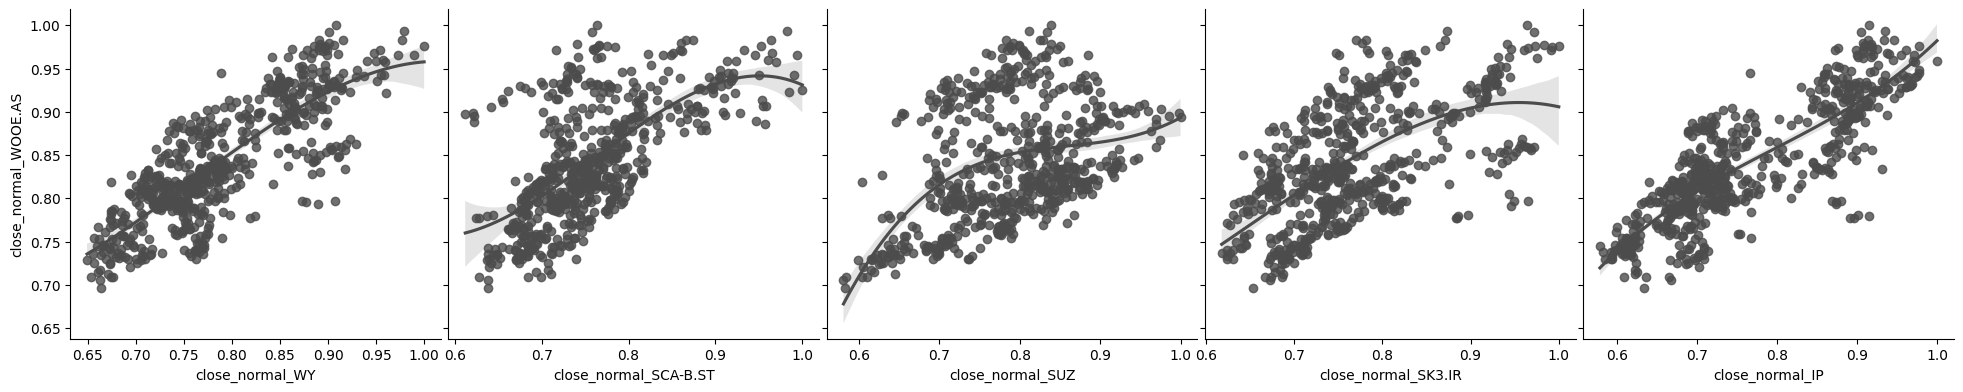

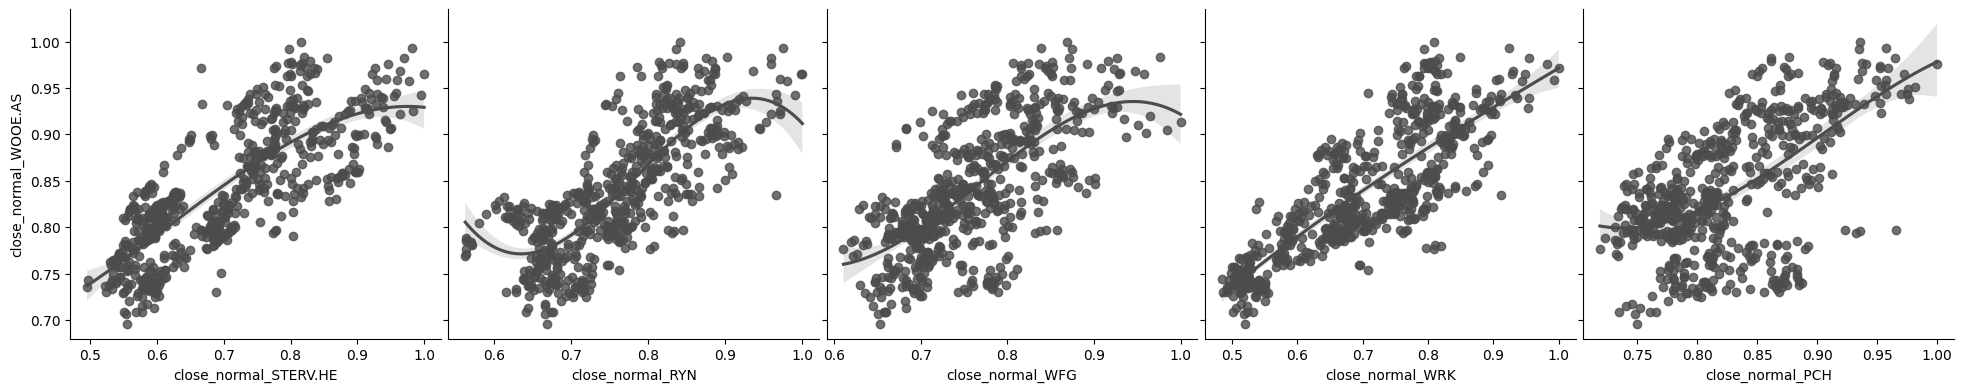

In [427]:
g = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=["close_normal_WY", "close_normal_SCA-B.ST",'close_normal_SUZ', 'close_normal_SK3.IR', 'close_normal_IP'], height=4)
h = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=['close_normal_STERV.HE','close_normal_RYN', 'close_normal_WFG', 'close_normal_WRK', 'close_normal_PCH'], height=4) # y_vars tips = ETF, x_vars = all stocks

g.map(sns.regplot, order = 3, color=".3")
h.map(sns.regplot, order = 3 , color=".3")

g.figure.subplots_adjust(wspace=.02, hspace=.02)
h.figure.subplots_adjust(wspace=.02, hspace=.02)

# Pipeline to do

In [198]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [199]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [200]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [201]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([0.79796385, 0.77716915, 0.82417739, 0.81880971])

## in sample evaluation

# simple linear regression

# multiple linear regression

## polynominal fit

In [220]:
mean_squared_error(aux_var_stock_prices['close_normal_WOOE.AS'], p(x))

0.0028445314550855686

## prediction and decision making

In [221]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [222]:
lm.fit(X, Y)
lm

LinearRegression()

In [223]:
yhat=lm.predict(new_input)
yhat[0:5]

/home/lj/JohannsenDrive/Aktuelle_Projekte/Scaja_Projekt/scaja_data/scaja_data_marketing/07_python_libraries_ultimate_toolkits/notebooks/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.93218241],
       [1.83764674],
       [2.74311107],
       [3.64857539],
       [4.55403972]])

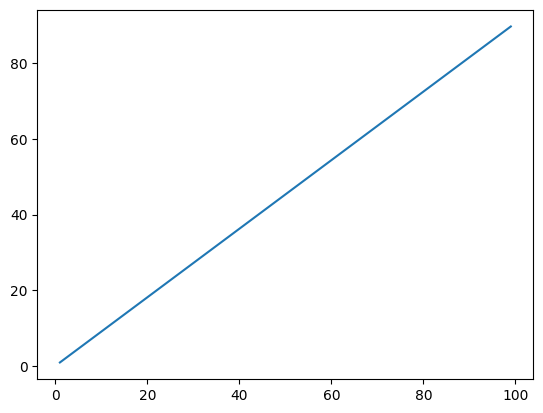

In [224]:
plt.plot(new_input, yhat)
plt.show()

# conclusion

Do the predicted values make sense?

simple linear regression:
R-squared: 
MSE: 

multiple linear regression:
R-squared: 
MSE: 

polynominal fit:
R-squared: 
MSE: 


Visualization           

Numerical measures for evaluation

Comparing models